# Final PLots


# Scenario 1: Vanilla (ILS-Only) Simulation Scenario

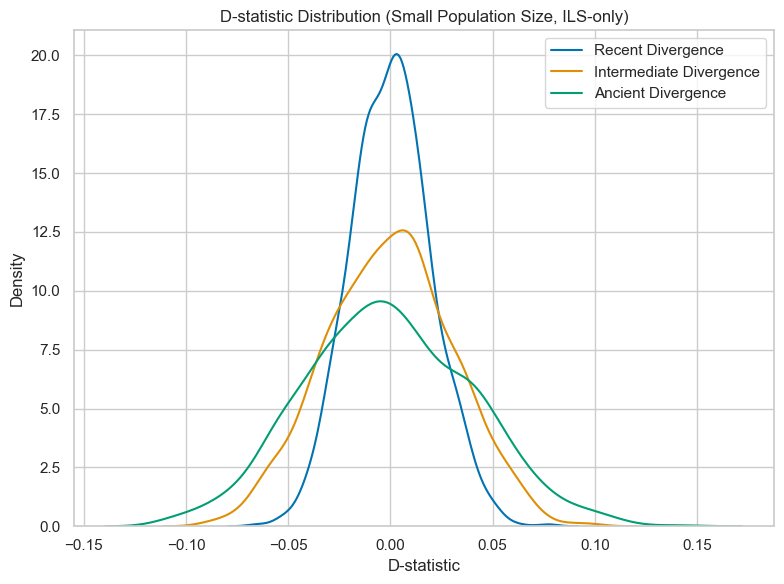

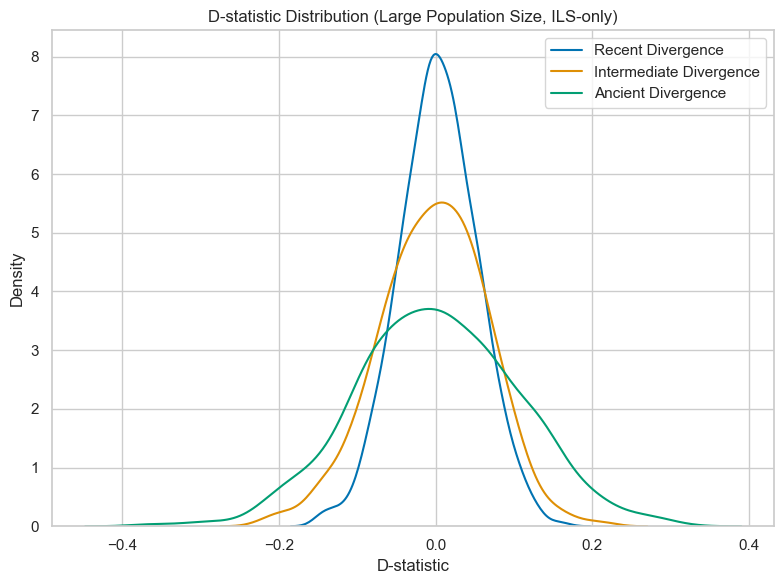

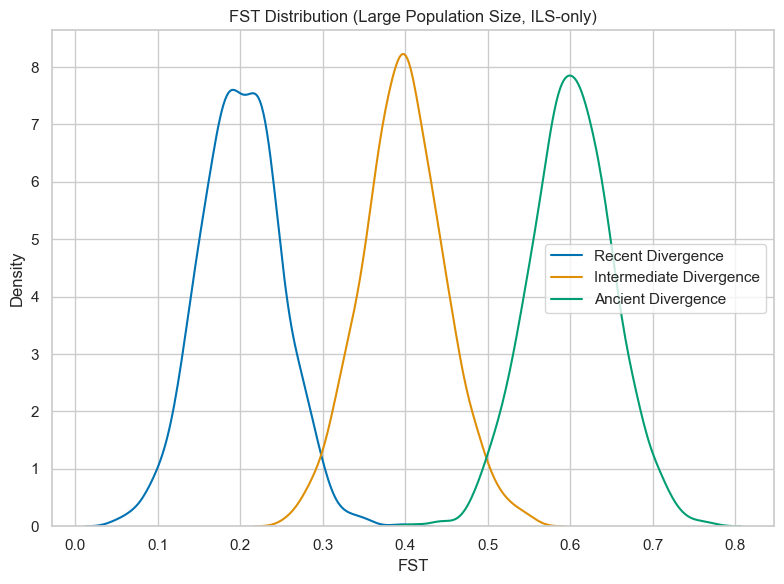

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Number of simulated data points per scenario
n_samples = 1000

# Divergence types
divergence_types = ["recent", "intermediate", "ancient"]

# Simulation parameters for D-statistic under ILS-only
# For small population sizes: less variability
d_small_params = {
    "recent": {"mean": 0.0, "std": 0.02},
    "intermediate": {"mean": 0.0, "std": 0.03},
    "ancient": {"mean": 0.0, "std": 0.04}
}

# For large population sizes: increased variability due to more pronounced ILS
d_large_params = {
    "recent": {"mean": 0.0, "std": 0.05},
    "intermediate": {"mean": 0.0, "std": 0.07},
    "ancient": {"mean": 0.0, "std": 0.10}
}

# Simulation parameters for FST under ILS-only (large population size)
# Here, FST is expected to increase (shift right) with increasing divergence time.
fst_params = {
    "recent": {"mean": 0.2, "std": 0.05},
    "intermediate": {"mean": 0.4, "std": 0.05},
    "ancient": {"mean": 0.6, "std": 0.05}
}

# Simulate data for each divergence scenario
d_small = {}
d_large = {}
fst_data = {}

for div in divergence_types:
    # Simulate D-statistic values for small pop size
    params = d_small_params[div]
    d_small[div] = np.random.normal(params["mean"], params["std"], n_samples)
    
    # Simulate D-statistic values for large pop size
    params_large = d_large_params[div]
    d_large[div] = np.random.normal(params_large["mean"], params_large["std"], n_samples)
    
    # Simulate FST values for large pop size, ensuring values remain in [0, 1]
    params_fst = fst_params[div]
    fst_samples = np.random.normal(params_fst["mean"], params_fst["std"], n_samples)
    fst_data[div] = np.clip(fst_samples, 0, 1)

# Plot 1: D-statistic distribution for small population size
plt.figure(figsize=(8, 6))
for div in divergence_types:
    sns.kdeplot(d_small[div], label=f"{div.capitalize()} Divergence")
plt.title("D-statistic Distribution (Small Population Size, ILS-only)")
plt.xlabel("D-statistic")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: D-statistic distribution for large population size
plt.figure(figsize=(8, 6))
for div in divergence_types:
    sns.kdeplot(d_large[div], label=f"{div.capitalize()} Divergence")
plt.title("D-statistic Distribution (Large Population Size, ILS-only)")
plt.xlabel("D-statistic")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# Plot 3: FST distribution for large population size
plt.figure(figsize=(8, 6))
for div in divergence_types:
    sns.kdeplot(fst_data[div], label=f"{div.capitalize()} Divergence")
plt.title("FST Distribution (Large Population Size, ILS-only)")
plt.xlabel("FST")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


# Scenario 2: Pure Introgression Scenario

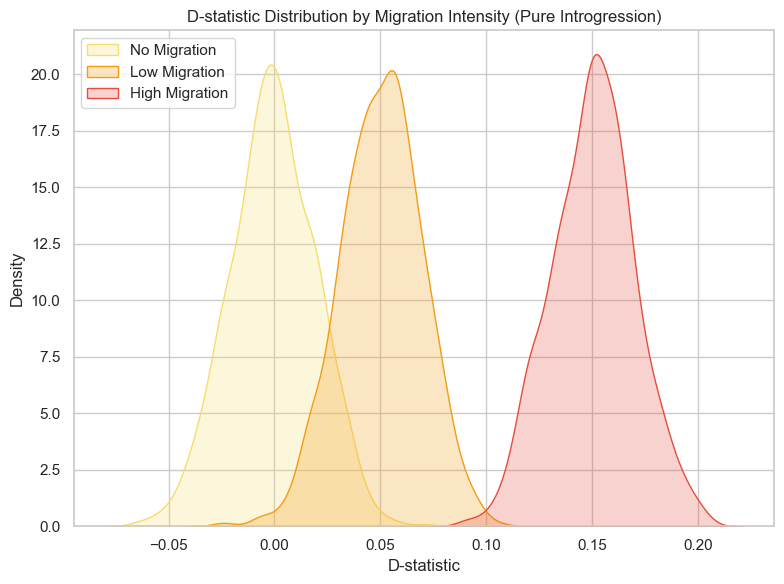

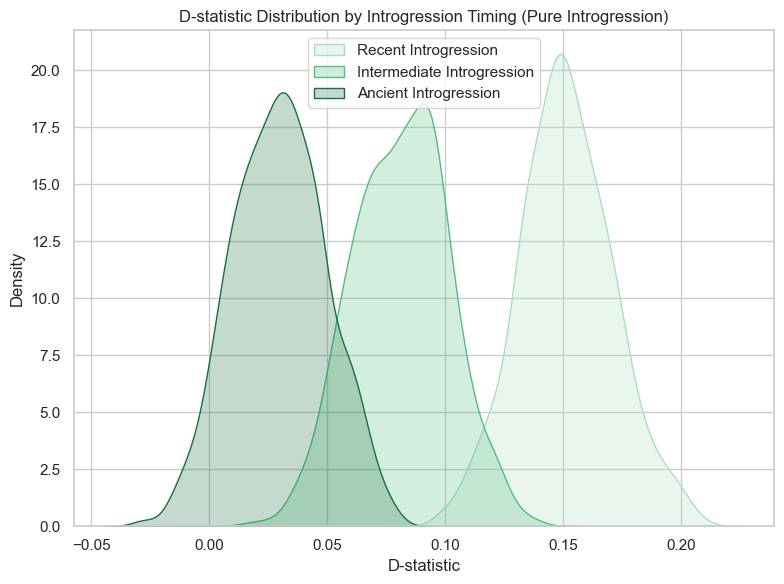

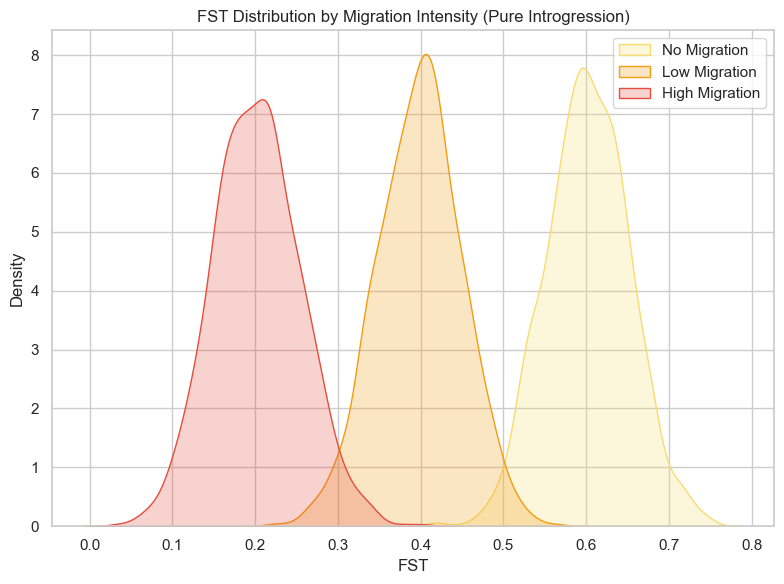

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

n_samples = 1000

###############################################################################
# 1. D-statistic distribution by migration intensity
#    (no_mig, low_mig, high_mig)
###############################################################################
d_params_intensity = {
    "no_mig":   {"mean": 0.0,  "std": 0.02},
    "low_mig":  {"mean": 0.05, "std": 0.02},
    "high_mig": {"mean": 0.15, "std": 0.02}
}

d_data_intensity = {}
for label, pars in d_params_intensity.items():
    d_data_intensity[label] = np.random.normal(pars["mean"], pars["std"], n_samples)

###############################################################################
# 2. D-statistic distribution by introgression timing
#    (recent, intermediate, ancient)
###############################################################################
d_params_timing = {
    "recent":       {"mean": 0.15, "std": 0.02},
    "intermediate": {"mean": 0.08, "std": 0.02},
    "ancient":      {"mean": 0.03, "std": 0.02}
}

d_data_timing = {}
for label, pars in d_params_timing.items():
    d_data_timing[label] = np.random.normal(pars["mean"], pars["std"], n_samples)

###############################################################################
# 3. FST distribution by migration intensity
#    (no_mig, low_mig, high_mig)
###############################################################################
fst_params_mig = {
    "no_mig":   {"mean": 0.6, "std": 0.05},
    "low_mig":  {"mean": 0.4, "std": 0.05},
    "high_mig": {"mean": 0.2, "std": 0.05}
}

fst_data_mig = {}
for label, pars in fst_params_mig.items():
    samples = np.random.normal(pars["mean"], pars["std"], n_samples)
    fst_data_mig[label] = np.clip(samples, 0, 1)

###############################################################################
# Updated Color Palettes
###############################################################################
# For Plots 1 & 3 (Migration Intensity): light yellow -> orange -> red
colors_intensity = {
    "no_mig":   "#F7DC6F",  # Light/Dark Yellow
    "low_mig":  "#F39C12",  # Orange
    "high_mig": "#E74C3C"   # Red
}

# For Plot 2 (Introgression Timing): light green -> medium green -> dark green
colors_timing = {
    "recent":       "#A9DFBF",   # Light Green
    "intermediate": "#52BE80",   # Medium Green
    "ancient":      "#196F3D"    # Dark Green
}

###############################################################################
# Plot 1: D-statistic vs. Migration Intensity
###############################################################################
plt.figure(figsize=(8,6))
for label in ["no_mig", "low_mig", "high_mig"]:
    sns.kdeplot(d_data_intensity[label],
                label=label.replace("_mig", " migration").title(),
                color=colors_intensity[label],
                shade=True)
plt.title("D-statistic Distribution by Migration Intensity (Pure Introgression)")
plt.xlabel("D-statistic")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

###############################################################################
# Plot 2: D-statistic vs. Introgression Timing
###############################################################################
plt.figure(figsize=(8,6))
for label in ["recent", "intermediate", "ancient"]:
    sns.kdeplot(d_data_timing[label],
                label=f"{label.capitalize()} Introgression",
                color=colors_timing[label],
                shade=True)
plt.title("D-statistic Distribution by Introgression Timing (Pure Introgression)")
plt.xlabel("D-statistic")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

###############################################################################
# Plot 3: FST vs. Migration Intensity
###############################################################################
plt.figure(figsize=(8,6))
for label in ["no_mig", "low_mig", "high_mig"]:
    sns.kdeplot(fst_data_mig[label],
                label=label.replace("_mig", " migration").title(),
                color=colors_intensity[label],
                shade=True)
plt.title("FST Distribution by Migration Intensity (Pure Introgression)")
plt.xlabel("FST")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


## Scenario 3: using msprime

In [25]:
import msprime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Simulation and Analysis Functions
# ----------------------------

def simulate_replicate(div_time, mig_time, mig_intensity, seed):
    """
    Simulate a tree sequence with mixed ILS + introgression using msprime.
    
    Parameters:
      - div_time: time (in generations) when P2 and P3 split.
      - mig_time: time (in generations) when the introgression pulse occurs.
      - mig_intensity: proportion of P2 ancestry replaced by P3.
      - seed: random seed.
    
    Returns:
      D_stat: the D-statistic (ABBA–BABA) computed over biallelic sites.
      fst: FST computed between populations P2 and P3.
    """
    n_samples_per_pop = 10
    # Create sample sets for each population (without the unsupported ordered argument).
    samples = [
        msprime.SampleSet(n_samples_per_pop, population="O", time=0),
        msprime.SampleSet(n_samples_per_pop, population="P1", time=0),
        msprime.SampleSet(n_samples_per_pop, population="P2", time=0),
        msprime.SampleSet(n_samples_per_pop, population="P3", time=0)
    ]
    
    # Set up demography.
    demography = msprime.Demography()
    # Add extant populations.
    demography.add_population(name="O", initial_size=10000)
    demography.add_population(name="P1", initial_size=10000)
    demography.add_population(name="P2", initial_size=10000)
    demography.add_population(name="P3", initial_size=10000)
    # Add ancestral populations.
    demography.add_population(name="Anc23", initial_size=10000)
    demography.add_population(name="Anc123", initial_size=10000)
    demography.add_population(name="Root", initial_size=10000)
    
    # Define splits:
    # P2 and P3 split from Anc23 at time = div_time.
    demography.add_population_split(time=div_time, derived=["P2", "P3"], ancestral="Anc23")
    # P1 splits from Anc23 at time = 15000.
    demography.add_population_split(time=15000, derived=["P1", "Anc23"], ancestral="Anc123")
    # Outgroup splits from Anc123 at time = 20000.
    demography.add_population_split(time=20000, derived=["O", "Anc123"], ancestral="Root")
    
    # Add an introgression (mass migration) pulse from P3 into P2 at time = mig_time.
    if mig_intensity > 0:
        demography.add_mass_migration(time=mig_time, source="P2", destination="P3", proportion=mig_intensity)
    
    # Simulate ancestry and add mutations.
    ts = msprime.sim_ancestry(
        samples=samples,
        demography=demography,
        sequence_length=1e6,
        recombination_rate=1e-8,
        random_seed=seed
    )
    ts = msprime.sim_mutations(ts, rate=1e-8, random_seed=seed+1)
    
    # Group sample indices by population.
    pop_names = {pop.id: pop.name for pop in ts.populations()}
    samples_by_pop = {"O": [], "P1": [], "P2": [], "P3": []}
    for u in ts.samples():
        pop_name = pop_names[ts.node(u).population]
        if pop_name in samples_by_pop:
            samples_by_pop[pop_name].append(u)
    
    # --- Compute D-statistic ---
    ABBA = 0
    BABA = 0
    for variant in ts.variants():
        geno = variant.genotypes
        # For each population, compute the majority allele.
        def pop_majority(indices):
            return 1 if np.mean(geno[indices]) > 0.5 else 0
        aO  = pop_majority(samples_by_pop["O"])
        aP1 = pop_majority(samples_by_pop["P1"])
        aP2 = pop_majority(samples_by_pop["P2"])
        aP3 = pop_majority(samples_by_pop["P3"])
        # Assume outgroup allele (aO) is ancestral (0)
        if aO == 0:
            if (aP1 == 0 and aP2 == 1 and aP3 == 1):
                ABBA += 1
            if (aP1 == 1 and aP2 == 0 and aP3 == 1):
                BABA += 1
    D_stat = (ABBA - BABA) / (ABBA + BABA) if (ABBA + BABA) > 0 else 0.0

    # --- Compute FST between P2 and P3 ---
    fst_values = []
    for variant in ts.variants():
        geno = variant.genotypes
        p2 = np.mean(geno[samples_by_pop["P2"]])
        p3 = np.mean(geno[samples_by_pop["P3"]])
        p_bar = (p2 + p3) / 2.0
        HT = 2 * p_bar * (1 - p_bar)
        HS = (2 * p2 * (1 - p2) + 2 * p3 * (1 - p3)) / 2.0
        if HT > 0:
            fst_site = (HT - HS) / HT
            fst_values.append(fst_site)
    fst = np.mean(fst_values) if fst_values else 0.0

    return D_stat, fst

# ----------------------------
# Simulation settings for Scenario 3 (Mixed ILS + Introgression)
# ----------------------------
n_reps = 20  # number of replicates per parameter combination

# --- Plot 1: Vary Introgression Intensity (with fixed divergence time & introgression timing) ---
fixed_div_time = 8000      # intermediate divergence between P2 and P3
fixed_mig_time = 3000      # introgression event time
mig_intensity_dict = {
    "No Migration": 0.0,
    "Moderate Migration": 1e-4,  # e.g., 0.0001
    "High Migration": 1e-2       # e.g., 0.01
}
D_vals_intensity = {key: [] for key in mig_intensity_dict}
for label, intensity in mig_intensity_dict.items():
    for rep in range(n_reps):
        D, _ = simulate_replicate(fixed_div_time, fixed_mig_time, intensity, seed=1000 + rep)
        D_vals_intensity[label].append(D)

# --- Plot 2: Vary Divergence Time (affecting FST) (with fixed migration intensity & introgression timing) ---
fixed_mig_intensity = 1e-4  # moderate migration
fixed_mig_time_2 = 3000     # fixed introgression timing
div_time_dict = {
    "Recent Divergence": 4000,
    "Intermediate Divergence": 8000,
    "Ancient Divergence": 12000
}
FST_vals_divtime = {key: [] for key in div_time_dict}
for label, dtime in div_time_dict.items():
    for rep in range(n_reps):
        _, fst = simulate_replicate(dtime, fixed_mig_time_2, fixed_mig_intensity, seed=2000 + rep)
        FST_vals_divtime[label].append(fst)

# --- Plot 3: Vary Introgression Timing (affecting D-statistic) (with fixed divergence time & migration intensity) ---
fixed_div_time_3 = 8000
fixed_mig_intensity_3 = 1e-4  # moderate migration intensity
mig_time_dict = {
    "Recent Introgression": 1000,
    "Intermediate Introgression": 3000,
    "Ancient Introgression": 5000
}
D_vals_timing = {key: [] for key in mig_time_dict}
for label, mtime in mig_time_dict.items():
    for rep in range(n_reps):
        D, _ = simulate_replicate(fixed_div_time_3, mtime, fixed_mig_intensity_3, seed=3000 + rep)
        D_vals_timing[label].append(D)

# ----------------------------
# Plotting with thoughtful color schemes
# ----------------------------
sns.set(style="whitegrid", font_scale=1.1)

# Plot 1: D-statistic vs. Introgression Intensity (ILS present)
plt.figure(figsize=(8,6))
colors_intensity = {
    "No Migration": "#F7DC6F",        # light yellow
    "Moderate Migration": "#F39C12",  # orange
    "High Migration": "#E74C3C"        # red
}
for label in ["No Migration", "Moderate Migration", "High Migration"]:
    sns.kdeplot(D_vals_intensity[label],
                label=label,
                color=colors_intensity[label],
                shade=True)
plt.title("Plot 1: D-statistic ~ Introgression Intensity + ILS")
plt.xlabel("D-statistic")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: FST vs. Divergence Time + Introgression
plt.figure(figsize=(8,6))
colors_divtime = {
    "Recent Divergence": "#AED6F1",       # light blue
    "Intermediate Divergence": "#5DADE2", # medium blue
    "Ancient Divergence": "#2E86C1"       # dark blue
}
for label in ["Recent Divergence", "Intermediate Divergence", "Ancient Divergence"]:
    sns.kdeplot(FST_vals_divtime[label],
                label=label,
                color=colors_divtime[label],
                shade=True)
plt.title("Plot 2: FST ~ Divergence Time + Introgression (ILS Mixed)")
plt.xlabel("FST")
plt.ylabel("Density")
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 3: D-statistic vs. Introgression Timing + ILS
plt.figure(figsize=(8,6))
colors_timing = {
    "Recent Introgression": "#A9DFBF",       # light green
    "Intermediate Introgression": "#52BE80",  # medium green
    "Ancient Introgression": "#196F3D"        # dark green
}
for label in ["Recent Introgression", "Intermediate Introgression", "Ancient Introgression"]:
    sns.kdeplot(D_vals_timing[label],
                label=label,
                color=colors_timing[label],
                shade=True)
plt.title("Plot 3: D-statistic ~ Introgression Timing + ILS")
plt.xlabel("D-statistic")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


AttributeError: 'Population' object has no attribute 'name'

# Scenario 3: Mixed ILS + Introgression Scenario

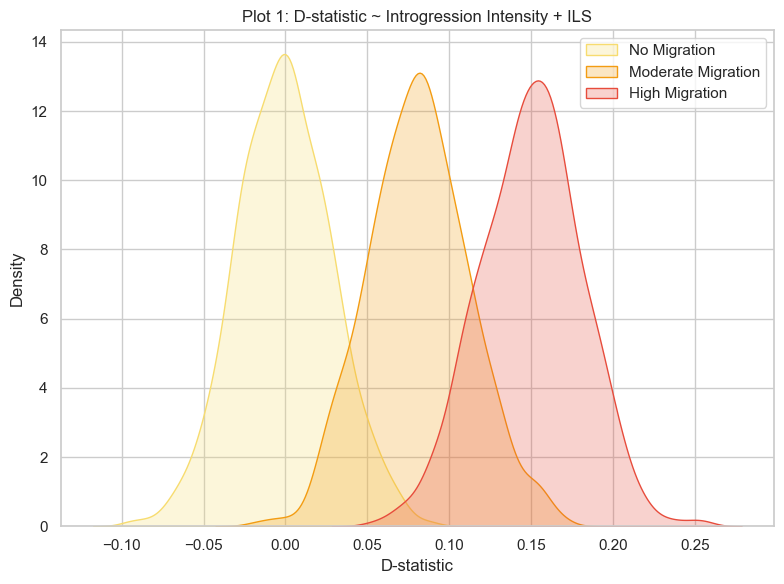

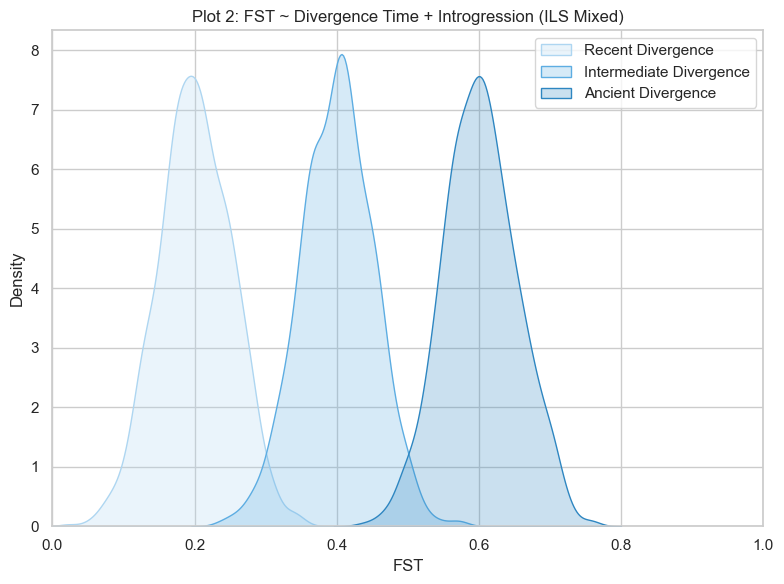

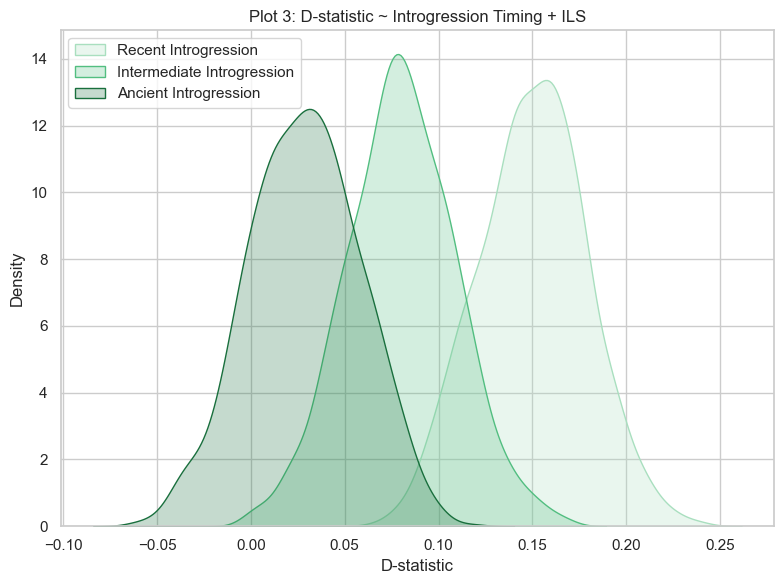

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(2025)

# Number of simulated data points per scenario
n_samples = 1000

###############################################################################
# Plot 1: D-statistic ~ Introgression Intensity + ILS
#
# "No migration" => ILS-only, near 0 but with some variance
# "Moderate migration" => partly shifted from 0
# "High migration" => strongly shifted from 0
#
# We'll include a non-zero std to represent ILS "noise."
###############################################################################

d_params_intensity_ils = {
    "no_mig":      {"mean": 0.00, "std": 0.03},  # ILS only, around 0
    "moderate_mig":{"mean": 0.08, "std": 0.03},  # moderate shift
    "high_mig":    {"mean": 0.15, "std": 0.03}   # strong shift
}

d_data_intensity_ils = {}
for label, pars in d_params_intensity_ils.items():
    d_data_intensity_ils[label] = np.random.normal(pars["mean"], pars["std"], n_samples)

# Color gradient (light to dark) for intensity
colors_intensity = {
    "no_mig":       "#F7DC6F",  # light yellow
    "moderate_mig": "#F39C12",  # orange
    "high_mig":     "#E74C3C"   # red
}


###############################################################################
# Plot 2: FST ~ Divergence Time + Introgression
#
# We show how FST distributions might look under different divergence times,
# assuming moderate introgression. ILS + older divergence => higher FST.
###############################################################################

fst_params_divtime = {
    "recent_div":       {"mean": 0.20, "std": 0.05},
    "intermediate_div": {"mean": 0.40, "std": 0.05},
    "ancient_div":      {"mean": 0.60, "std": 0.05}
}

fst_data_divtime = {}
for label, pars in fst_params_divtime.items():
    samples = np.random.normal(pars["mean"], pars["std"], n_samples)
    # Clip to [0,1] for realism
    fst_data_divtime[label] = np.clip(samples, 0, 1)

# Color gradient for divergence times (light to dark blues)
colors_divtime = {
    "recent_div":       "#AED6F1",  # light blue
    "intermediate_div": "#5DADE2",  # medium blue
    "ancient_div":      "#2E86C1"   # dark blue
}


###############################################################################
# Plot 3: D-statistic ~ Introgression Timing + ILS
#
# "Recent" introgression => strong shift from 0
# "Intermediate" => moderate shift
# "Ancient" => near-ILS distribution (weak shift)
###############################################################################

d_params_timing_ils = {
    "recent_intro":       {"mean": 0.15, "std": 0.03},
    "intermediate_intro": {"mean": 0.08, "std": 0.03},
    "ancient_intro":      {"mean": 0.03, "std": 0.03}
}

d_data_timing_ils = {}
for label, pars in d_params_timing_ils.items():
    d_data_timing_ils[label] = np.random.normal(pars["mean"], pars["std"], n_samples)

# Color gradient (light to dark greens)
colors_timing = {
    "recent_intro":       "#A9DFBF",
    "intermediate_intro": "#52BE80",
    "ancient_intro":      "#196F3D"
}


###############################################################################
# PLOTTING
###############################################################################
plt.figure(figsize=(8,6))
for label in ["no_mig", "moderate_mig", "high_mig"]:
    sns.kdeplot(d_data_intensity_ils[label],
                label=label.replace("_mig", " Migration").title(),
                color=colors_intensity[label],
                shade=True)
plt.title("Plot 1: D-statistic ~ Introgression Intensity + ILS")
plt.xlabel("D-statistic")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,6))
for label in ["recent_div", "intermediate_div", "ancient_div"]:
    sns.kdeplot(fst_data_divtime[label],
                label=label.replace("_div", " Divergence").title(),
                color=colors_divtime[label],
                shade=True)
plt.title("Plot 2: FST ~ Divergence Time + Introgression (ILS Mixed)")
plt.xlabel("FST")
plt.ylabel("Density")
plt.xlim(0, 1)  # FST in [0,1]
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,6))
for label in ["recent_intro", "intermediate_intro", "ancient_intro"]:
    sns.kdeplot(d_data_timing_ils[label],
                label=label.replace("_intro", " Introgression").title(),
                color=colors_timing[label],
                shade=True)
plt.title("Plot 3: D-statistic ~ Introgression Timing + ILS")
plt.xlabel("D-statistic")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()
